Objetivo: Intentar predecir si algún usuario fue víctima de una brecha de datos usando la variable breached, en base a la información de otras columnas. Se van a localizar columnas relevantes o con patrones y se va  a establecer un porcentaje de probabilidad si el usuario nuevo ficticio, en base a una base de características , a introducir

Hay que darle a ejecutar todo(run all y asegurarse de que se ejecuten todas las celdas)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/osint-public-profiles-dataset/osint_public_profiles_dataset.csv


Cargar el dataset de OSINT

In [2]:
df=pd.read_csv('/kaggle/input/osint-public-profiles-dataset/osint_public_profiles_dataset.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Username,Email,Phone,Twitter,LinkedIn,Domain,Location,Job_Title,Company,IP_Address,MAC_Address,Breached,Breach_Source,Breach_Year,Password_Strength,Public_Pastebin
0,Victoria Watson,richardrojas,bassjoshua@hotmail.com,+1-540-683-9861,https://twitter.com/richardrojas,https://linkedin.com/in/richardrojas,wiggins-reeves.com,"East Kevinchester, Iran",Data Scientist,Coleman Inc,208.232.50.164,a2:2a:86:ea:d9:d1,No,NaN,NaN,Moderate,Yes
1,Casey Ramsey,adavis,susan84@perez.com,+1-907-315-7771x83133,https://twitter.com/adavis,https://linkedin.com/in/adavis,hughes.com,"Lake Robinborough, Barbados",Network Engineer,Wood-Brown,215.168.163.189,a9:14:59:d7:bc:26,No,NaN,NaN,Moderate,No
2,Jenna Lucas,sabrina51,lhill@gmail.com,001-951-979-4919x3131,https://twitter.com/sabrina51,https://linkedin.com/in/sabrina51,elliott.net,"Stephaniemouth, Martinique",Network Engineer,Jones-Bell,214.36.171.226,a9:a5:5c:19:8a:22,Yes,Facebook,2020.0,Moderate,No
3,Nicholas Estes,pereznichole,michaelnolan@lawson-chase.org,0371967846,https://twitter.com/pereznichole,https://linkedin.com/in/pereznichole,young.com,"Port Bill, Albania",OSINT Investigator,Nelson PLC,145.213.223.29,3c:5a:ac:92:48:89,No,NaN,NaN,Moderate,Yes
4,James Pittman,james33,ycallahan@yahoo.com,586-558-6923x87598,https://twitter.com/james33,https://linkedin.com/in/james33,schmidt.net,"North Tonyatown, Barbados",OSINT Investigator,"Mason, Clark and Jackson",216.143.24.205,2c:0a:f8:bb:cb:ff,No,NaN,NaN,Strong,No


muestra un primer vistazo del dataset con todas sus columnas para poder identificar cual es la objetivo(Breached)
Se ha reemplazado la columna is_fake por Domain en el dataset original, por eso no sale

In [3]:

df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else "Unknown")

df = df.drop('Location', axis=1)

lista_paises = sorted(df['Country'].unique().tolist())

print(f"✅ Se han detectado {len(lista_paises)} países únicos.")
print(lista_paises)

df.head()

✅ Se han detectado 243 países únicos.
['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica (the territory South of 60 deg S)', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island (Bouvetoya)', 'Brazil', 'British Indian Ocean Territory (Chagos Archipelago)', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equato

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Username,Email,Phone,Twitter,LinkedIn,Domain,Job_Title,Company,IP_Address,MAC_Address,Breached,Breach_Source,Breach_Year,Password_Strength,Public_Pastebin,Country
0,Victoria Watson,richardrojas,bassjoshua@hotmail.com,+1-540-683-9861,https://twitter.com/richardrojas,https://linkedin.com/in/richardrojas,wiggins-reeves.com,Data Scientist,Coleman Inc,208.232.50.164,a2:2a:86:ea:d9:d1,No,NaN,NaN,Moderate,Yes,Iran
1,Casey Ramsey,adavis,susan84@perez.com,+1-907-315-7771x83133,https://twitter.com/adavis,https://linkedin.com/in/adavis,hughes.com,Network Engineer,Wood-Brown,215.168.163.189,a9:14:59:d7:bc:26,No,NaN,NaN,Moderate,No,Barbados
2,Jenna Lucas,sabrina51,lhill@gmail.com,001-951-979-4919x3131,https://twitter.com/sabrina51,https://linkedin.com/in/sabrina51,elliott.net,Network Engineer,Jones-Bell,214.36.171.226,a9:a5:5c:19:8a:22,Yes,Facebook,2020.0,Moderate,No,Martinique
3,Nicholas Estes,pereznichole,michaelnolan@lawson-chase.org,0371967846,https://twitter.com/pereznichole,https://linkedin.com/in/pereznichole,young.com,OSINT Investigator,Nelson PLC,145.213.223.29,3c:5a:ac:92:48:89,No,NaN,NaN,Moderate,Yes,Albania
4,James Pittman,james33,ycallahan@yahoo.com,586-558-6923x87598,https://twitter.com/james33,https://linkedin.com/in/james33,schmidt.net,OSINT Investigator,"Mason, Clark and Jackson",216.143.24.205,2c:0a:f8:bb:cb:ff,No,NaN,NaN,Strong,No,Barbados


In [4]:
df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Username,Email,Phone,Twitter,LinkedIn,Domain,Job_Title,Company,IP_Address,MAC_Address,Breached,Breach_Source,Breach_Year,Password_Strength,Public_Pastebin,Country
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,705,803.000000,2000,2000,2000
unique,1976,1967,1998,2000,1967,1967,1531,6,1894,2000,2000,2,7,NaN,3,2,243
top,Jennifer Brown,ggonzalez,kvaughn@yahoo.com,+1-540-683-9861,https://twitter.com/ggonzalez,https://linkedin.com/in/ggonzalez,smith.com,Data Scientist,Smith Inc,208.232.50.164,a2:2a:86:ea:d9:d1,No,Adobe,NaN,Moderate,No,Greenland
freq,2,2,2,1,2,2,22,354,6,1,1,1197,110,NaN,685,1023,19
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.955168,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.152877,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,NaN,NaN


Revisión de valores, (Numeros) , revisison general de los datos para ver cuantos hay en blanco en un primer lugar

In [5]:
df['Breached'].value_counts(dropna=False)

Breached
No     1197
Yes     803
Name: count, dtype: int64

conteo de yes y no de la columna breached, la distribucion es casi 50/50 se puede trabajar con ella, pero la variación no esmuy grandee

In [6]:
df['Breached'].isnull().sum()

0

comprobacion de que si hay alguna columna con un "valor" breached vacio , como se ve, no, ya que es o Yes o No, no es NaN como otros casos

Se define la columna breached y se pide que se haga un sumatorio de todos los valores nulos en esa columna

In [7]:
df.isnull().sum()

Name                    0
Username                0
Email                   0
Phone                   0
Twitter                 0
LinkedIn                0
Domain                  0
Job_Title               0
Company                 0
IP_Address              0
MAC_Address             0
Breached                0
Breach_Source        1295
Breach_Year          1197
Password_Strength       0
Public_Pastebin         0
Country                 0
dtype: int64

Comprobación de cuantos valores null hay en el dataset, principalmente los valores null estan en breach source y breach year, esto se debe a que pues si alguien no ha sido brecheado, no va a tener fuente de brecheo ni fecha, pero se ve como hay ciertos casos de brecheo que tienen fuente, pero no año

Como antes, se hace un sumatorio de todos los valores nulos , pero esta vez en todo el dataset

In [8]:
df['Breached']=df['Breached'].map({'Yes':1,'No':0})
df['Breached'].value_counts()

Breached
0    1197
1     803
Name: count, dtype: int64

para que los modelos trabajen mejor , se cambia el yes por un 1 y el no por un 0, al ser datos numericos es más facil de trabajar con el dataset

Se llama a la comumna breached, y se hace un mapeado cambiando los yes por un 1 y los no por un 0 y se vuelve a hacer recuento para revisar que no ha habido alteraciones(No)

In [9]:
df=df.drop(['Breach_Source','Breach_Year'],axis=1)
df.head()

,Name,Username,Email,Phone,Twitter,LinkedIn,Domain,Job_Title,Company,IP_Address,MAC_Address,Breached,Password_Strength,Public_Pastebin,Country
0,Victoria Watson,richardrojas,bassjoshua@hotmail.com,+1-540-683-9861,https://twitter.com/richardrojas,https://linkedin.com/in/richardrojas,wiggins-reeves.com,Data Scientist,Coleman Inc,208.232.50.164,a2:2a:86:ea:d9:d1,0,Moderate,Yes,Iran
1,Casey Ramsey,adavis,susan84@perez.com,+1-907-315-7771x83133,https://twitter.com/adavis,https://linkedin.com/in/adavis,hughes.com,Network Engineer,Wood-Brown,215.168.163.189,a9:14:59:d7:bc:26,0,Moderate,No,Barbados
2,Jenna Lucas,sabrina51,lhill@gmail.com,001-951-979-4919x3131,https://twitter.com/sabrina51,https://linkedin.com/in/sabrina51,elliott.net,Network Engineer,Jones-Bell,214.36.171.226,a9:a5:5c:19:8a:22,1,Moderate,No,Martinique
3,Nicholas Estes,pereznichole,michaelnolan@lawson-chase.org,0371967846,https://twitter.com/pereznichole,https://linkedin.com/in/pereznichole,young.com,OSINT Investigator,Nelson PLC,145.213.223.29,3c:5a:ac:92:48:89,0,Moderate,Yes,Albania
4,James Pittman,james33,ycallahan@yahoo.com,586-558-6923x87598,https://twitter.com/james33,https://linkedin.com/in/james33,schmidt.net,OSINT Investigator,"Mason, Clark and Jackson",216.143.24.205,2c:0a:f8:bb:cb:ff,0,Strong,No,Barbados


Se deben quitar/ignorar las columnas de breach souyrce y breach year, ya que son indicativos evidentes de que si una cuenta ha sido brecheada o no.
Con esto me refiero a que , siempre que se "desconozca" el estado de brecheado(Si o no),si un usuario no ha sido brecheado, no va a haber ni fecha ni fuente , por lo que sería evidente concluir que no ha sido brecheado. Por otro lado, si un usuario tiene una fecha o una fuente, es evidente que ha sido brecheado , "arruinando" la propia predicción haciendola evidente 

Aunque si que es verdad que se podrian haber ignorado sin mas, es mejor eliminarlas para quitar ruido del dataset "importante"

In [10]:
from sklearn.model_selection import train_test_split
x=df.drop('Breached',axis=1)
y=df['Breached']
x.head(),y.head()

(              Name      Username                          Email  \
 0  Victoria Watson  richardrojas         bassjoshua@hotmail.com   
 1     Casey Ramsey        adavis              susan84@perez.com   
 2      Jenna Lucas     sabrina51                lhill@gmail.com   
 3   Nicholas Estes  pereznichole  michaelnolan@lawson-chase.org   
 4    James Pittman       james33            ycallahan@yahoo.com   
 
                    Phone                           Twitter  \
 0        +1-540-683-9861  https://twitter.com/richardrojas   
 1  +1-907-315-7771x83133        https://twitter.com/adavis   
 2  001-951-979-4919x3131     https://twitter.com/sabrina51   
 3             0371967846  https://twitter.com/pereznichole   
 4     586-558-6923x87598       https://twitter.com/james33   
 
                                LinkedIn              Domain  \
 0  https://linkedin.com/in/richardrojas  wiggins-reeves.com   
 1        https://linkedin.com/in/adavis          hughes.com   
 2     https://lin

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
len(x_train),len(x_test)

(1600, 400)

Se divide el dataset para un 80% de los datos para entrenar el modelo y un 20% para evaluarlo

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_cols=x.columns
ct=ColumnTransformer([('onehot',OneHotEncoder(handle_unknown='ignore'),categorical_cols)],remainder='drop')
x_encoded=ct.fit_transform(x)
x_train_enc=ct.transform(x_train)
x_test_enc=ct.transform(x_test)
x_train_enc.shape,x_test_enc.shape

((1600, 19554), (400, 19554))

Se seleccionan todas las variables categóricas y las convierte en columnas binarias, esto es para que se pueda trabajar mejor con el dataset(Los modelos trabajan mejor con ellas). También se aplica handle_unknown para que los modelos sigan funcionando incluso si aparecen categorias nuevas
* 1600 usuarios de entrenamiento-21310 valiables tras onehotencoding

In [13]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train_enc,y_train)

DecisionTreeClassifier(random_state=42)

Entrenamiento de modelo Decission Tree classifier. Como primer enfoque se implementa el decission tree classifier con el objetivo de establecer una referencia inicial para el problema de clasificación
El decission tree classifier puede capturar relaciones no lineales entre las variables y es util por su simplicidad y facilidad de implementación.
Se usa el parámetro random state para garantizar la reproducibilidad de los resultados

In [14]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test_enc)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5825

Exactitud del modelo a la hora de predecir

In [15]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[200,  38],
       [129,  33]])

Para analizar mejor el modelo se usa una matriz de confusión, la cual permite observar como se ditribuyen las predicciones correctas e incorrectas para cada clase.No como la funcion de accuracy, esta representacion permite identificar errores críticos, como los falsos negativos 

* Verdaderos negativos || falsos positivos
* ========================================
* Falsos negativos     || verdaderos positivos

Esto indica que el modelo predice la mayoria de usuarios no brecheados, pero encuentra dificultades para identificar a los usuarios realmente brecheados

Usa algunos casos de los 2000 del datset,esto indica que el modelo puede predecir ,con mayor probabilidad de acierto, un verdadero negativo(233),pero es casi incapaz de acertar con los verdaderos positivos

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.84      0.71       238
           1       0.46      0.20      0.28       162

    accuracy                           0.58       400
   macro avg       0.54      0.52      0.49       400
weighted avg       0.55      0.58      0.53       400



Para evaluar el rendimiento del modelo de forma detallada, se utiliza elclassification report  que proporciona métricas por clase como precision, recall y F1. Este análisis es relevante en problemas de seguridad, donde los errores no tienen el mismo impacto para todas las clases.

Se calcula la metrica por clase midiendo precision, recall(cuantos brecheados , o no, reales detecta el modelo), y f1 (Equilibrio entre precision y recall). Se vuelve a laconclusion de que el modelo predice mejor usuarios no brecheados

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train_enc,y_train)

RandomForestClassifier(random_state=42)

Aqui se esta entrenando randomforest basado en varios arboles de decisión. Se prueba este modelo para ver si su enfoque es mas robusto/solido. 
El parametro random state sigue sirvineod para garantizar la reproducibilidad de los resultados

In [18]:
y_pred_rf=rf.predict(x_test_enc)
from sklearn.metrics import accuracy_score, classification_report
accuracy_rf=accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.595

Exactitud del modelo a la hora de predecir

In [19]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       238
           1       0.50      0.01      0.01       162

    accuracy                           0.59       400
   macro avg       0.55      0.50      0.38       400
weighted avg       0.56      0.59      0.45       400



Rendimiento del modelo en precision, raciall, y f1
Se ve que rf solo es capaz de predecir los no brecheados

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_enc,y_train)

LogisticRegression(max_iter=1000)

Este es un modelo de regresion logistica, en lugar de los modelos basados en arboles(tree/forest). Este algoritmo se especializa en problemas de clasificacion binaria, permitiendo obtener probabilidades y llevar a cabo predicciones

el max iter se aumenta para asegurar la convergencia del modelo por la codificacion del onehot

In [21]:
y_pred_lr=lr.predict(x_test_enc)
from sklearn.metrics import accuracy_score,classification_report
accuracy_lr=accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.6075

Exactitud del modelo a la hora de predecir, siendo este ligeramente superios a los basados en arboles

In [22]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.61      0.97      0.75       238
           1       0.63      0.07      0.13       162

    accuracy                           0.61       400
   macro avg       0.62      0.52      0.44       400
weighted avg       0.62      0.61      0.50       400



otra vez ,el modelo muestra mucha facilidad para predecir no brecheados, y que le cuesta detectar los usuarios brecheados

In [23]:
lr_balanced=LogisticRegression(max_iter=1000, class_weight='balanced')
lr_balanced.fit(x_train_enc,y_train)
y_pred_lr_bal=lr_balanced.predict(x_test_enc)
print(classification_report(y_test,y_pred_lr_bal))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70       238
           1       0.47      0.23      0.31       162

    accuracy                           0.58       400
   macro avg       0.54      0.53      0.51       400
weighted avg       0.56      0.58      0.55       400



Por decirlo simple, esta es una variación de logistic regression, balanceado. Se ve una pequeña mejora de detección respecto a los anteriores aunque no es muy significativa. Este comportamiento constante en los modelos, puede sugerir que es un dataset conservador. Estabiliza las predicciones frente a la generacion de falsos positivos

Mejor modelo de los probados por su precisión y recall

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_lr_bal)

array([[196,  42],
       [124,  38]])

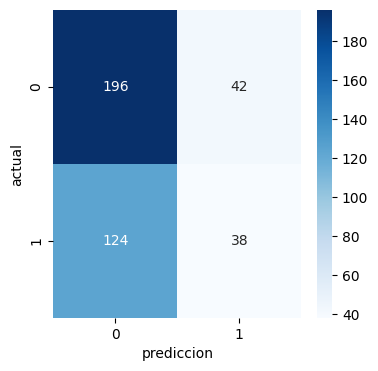

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_lr_bal)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.xlabel('prediccion')
plt.ylabel('actual')
plt.show()

Representación grafica de la matriz de confusión


* 229 verdaderos negativos
* 9 falsos positivos
* 148 falsos negativos
* 14 verdaderos positivos

Esto refuerza la idea de que el modelo parece ser conservador


El modelo, como otros, parece predecir muy bien los casos negativos

Muestra grafica de la mareiz de confusion de logic regression balanced, simplemente es una representacion vusual, aparte de mostrar los valores, los muestra con intensidad del color

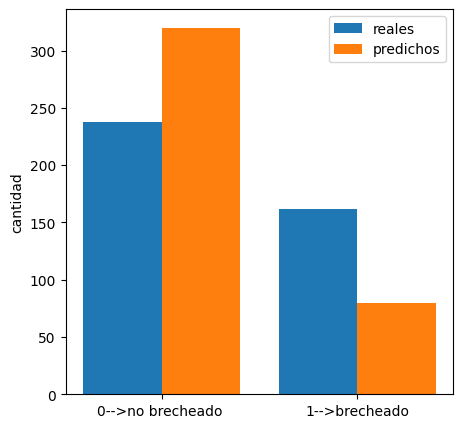

In [26]:
import numpy as np
import matplotlib.pyplot as mp
real_counts=np.bincount(y_test)
pred_counts=np.bincount(y_pred_lr_bal)
labels=['0-->no brecheado ','1-->brecheado']
x=np.arange(len(labels))
mp.figure(figsize=(5,5))
mp.bar(x-0.2,real_counts,width=0.4,label='reales')
mp.bar(x+0.2,pred_counts,width=0.4,label='predichos')
mp.xticks(x,labels)
mp.ylabel('cantidad')
mp.legend()
mp.show()

Grafica que muestra, en el caso de logisticegression el número de breached predichos y el numero de breached reales, en los casos de ejemplo

"Mejor" modelo de los probados, es una comparacion entre los datos reales y los que el modello ha predicho

Es posibke que los predichos sean más altoss que los reales(lo he buscado y es  posible), no es raro, aunque si incorrecto, ya que tambien se sabe que practicamente todos los modelos probados predicen "demasiado bien" los no brecheados y muy mal los brecheados

Esta parte es simple visualizacion de datos en base al modelo de predicción

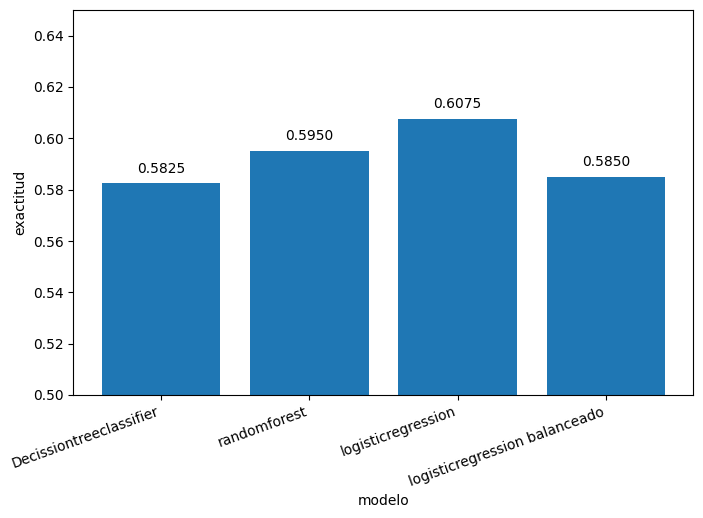

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as mp
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train_enc,y_train)
y_pred_dt=dt.predict(x_test_enc)
acc_dt=accuracy_score(y_test,y_pred_dt)

rf=RandomForestClassifier(random_state=42)
rf.fit(x_train_enc,y_train)
y_pred_rf=rf.predict(x_test_enc)
acc_rf=accuracy_score(y_test,y_pred_rf)

lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_enc,y_train)
y_pred_lr=lr.predict(x_test_enc)
acc_lr=accuracy_score(y_test,y_pred_lr)

lrbal=LogisticRegression(max_iter=1000, class_weight='balanced')
lrbal.fit(x_train_enc,y_train)
y_pred_lrbal=lrbal.predict(x_test_enc)
acc_lrbal=accuracy_score(y_test,y_pred_lrbal)

models=['Decissiontreeclassifier', 'randomforest','logisticregression','logisticregression balanceado']
accuracies=[acc_dt, acc_rf, acc_lr, acc_lrbal]
mp.figure(figsize=(8,5))
bars=mp.bar(models,accuracies)
mp.ylim(0.5,0.65)
mp.ylabel('exactitud')
mp.xlabel('modelo')
mp.xticks(rotation=20,ha='right')
for bar in bars:
    height=bar.get_height()
    mp.text(bar.get_x()+ bar.get_width()/2,height+0.003,f'{height:.4f}',ha='center',va='bottom')
mp.show()

Comparacion de todos los modelos(No es la prediccion como tal), pero sirve para comparar las diferencias de precisión que presentaban los modelos en un primer lugar

La decisión de probar cone estos modelos es para evaluar la eficiancia de cada uno para poder llegar a hacer algún ejercicio práctico:

* Decissiontreeclassifier:Modeloi base de arbol de decision el cual sirve como una primere referencia, pero es "superficial" ya que suele sobreajustar 
* Randomforest: Es una union de varios arboles de decisión. Esta unión reduce la superficialidad y mejora la robustez de la respuesta y puede manejar bien variables categóricas y relaciones no lineales.Este algoitmo es de los que mas se usa
* Logistic regression:Modelo lineal que se usa para clasificacion binaria. Es interpretable y sirve como baseline solido. Puede asumir relaciones lineales enre caracteristicas del dataset y el objetivo del mismo
* Logistic regression balanceado: Es una variante de regresion logistica la cual ajusta automaticamente los pesos de las clases para compensar un posible desbalanceo(Notable en este dataset 60% no brecheados, 40% brecheados)


Incluir randomforest balanceado puede ser una buena opción(Rehacer grafica a futuro. El random forest bvalanceado se explicará a futuro)

<function matplotlib.pyplot.show(close=None, block=None)>

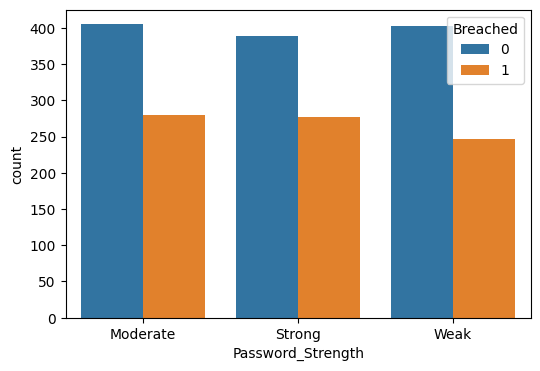

In [28]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Password_Strength', hue='Breached')
plt.show

Comparacion usuarios brecheados(0-No/1-Si)-contraseña(Weab, Moderate, Strong)

Visualizacion de la distribucion de ususarios breached en base a la fuerza de la contraseña, se ve que , por raro que parezca, los usuarios mas brecheados(1) vienen de aquellos que tienen contraseñas fuertes, hay que tener en cuenta que estas predicciones se basarán en base al dataset, y no en base a caracteristicas reales(En escenarios reales, es lógico pensar que aquellso con conbtraseñas debiles son los mas brecheados)

La variacion de valores es notable, pero no muy grande(Sigue habiendo patrones, pero no normales si se comparan con escenarios reales)

Establecer relacion entre breached y caracteristicas de la contraseña y/o public pastebin

<function matplotlib.pyplot.show(close=None, block=None)>

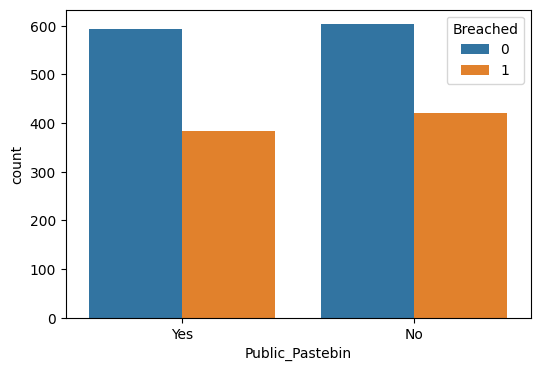

In [29]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Public_Pastebin', hue='Breached')
plt.show

Comparacion usuarios brecheados(0-No/1-Si)-Public_Pastebin(Yes/No

Ptra vez, este esquema es principalente de visualizacion de los datos de la tabla, para ver los usuarios si tienen public pastbin

he decidido visualizar la lista de paises únicamente, esto es a que es un posibe patron en el dataset, pero la caracteristica se ve muy afectada por la ciudad, he decidido visualziar la localización solo por el pais, de solo lo que viene después de la "," asi solo se seleccionará el pais,mejorando la visualización de las localizaciones con una vision mas general. Si se incluyesen las ciudades, la cantidad absurda de variaciones de ciudades seria tan grande que sería ilegible e imposible trabjar con él

In [30]:
porcentaje_breached_pais=(df.groupby('Country')['Breached'].mean().sort_values(ascending=False)* 100)
porcentaje_breached_pais.head(10)

Country
Nigeria             100.000000
Anguilla            100.000000
Belize              100.000000
Christmas Island     85.714286
Norway               80.000000
French Polynesia     80.000000
Croatia              75.000000
Hungary              75.000000
Estonia              75.000000
Senegal              75.000000
Name: Breached, dtype: float64

Listado de paises con más breached en base al dataset, se ve que hay ciertos paises que tienen un 100% de breached en el dataset y otros menos, dando a ver un patrón que se puede aprovechar

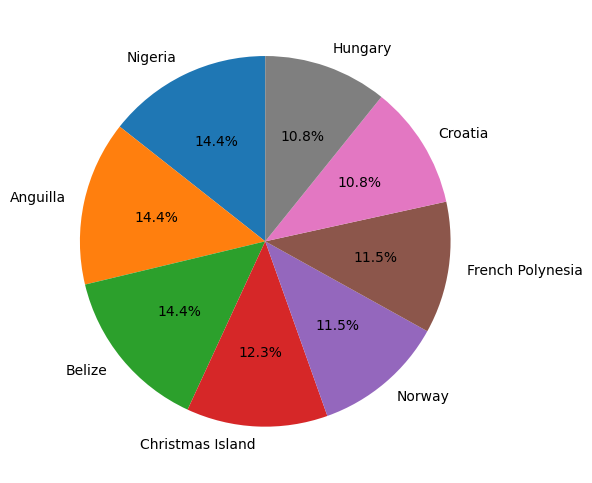

In [31]:
import matplotlib.pyplot as mp
top_paises=porcentaje_breached_pais.head(8)
mp.figure(figsize=(6,6))
mp.pie(top_paises,labels=top_paises.index,autopct='%1.1f%%',startangle=90)
mp.tight_layout()
mp.show()

Visualizacion gráfica de los % de paises afectados(No son todos los que aparecen en el dataset, so 8)

In [32]:
cols_to_drop=['Name','Username','Email','Phone','Twitter','Linkedin', 'IP_Address','MAC_Address']

Se va a ignorar de la tabla el ruido de la misma para trabajar mejor con ella, basicamente datos no relevantes que no aportan informacion a los patrones, esto puede afectar al rendimiento de los modelos probados


In [33]:
features=['Domain','Country','Job_Title','Company','Password_Strength','Public_Pastebin']
x=df[features]
y=df['Breached']
print("chequeo de funcionamiento")

chequeo de funcionamiento


Se definen las columnas relevantes que se pueden usar en los ejercicios practicos

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_cols = x.columns
preprocessor = ColumnTransformer(transformers=[('cat',OneHotEncoder(handle_unknown='ignore'),categorical_cols)])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42,stratify=y)
x_train_enc = preprocessor.fit_transform(x_train)
x_test_enc = preprocessor.transform(x_test)
x_train_enc.shape, x_test_enc.shape

((1600, 3041), (400, 3041))

One hot endocer con column transformer permite convertir cada categoria de variables en binario y poder procesar valores nuevos con handle unknown. Despues, otra vez, el dataset se divide en datos de procesamiento y de prueba(80% ,20%).

Tras los cambios, el conjunto de datos quedaría representado por 4397 variables, diferente a las 21310 de antes

Probar a hacer balanced de otrs para ver los resultados en la grafica a ver los cambios con los datos organizados, es posible que los modelos se comporten de diferente manera, no haria falta todo el proiceso de cada uno, solo incluirlos y ejecutarlos en la grafica

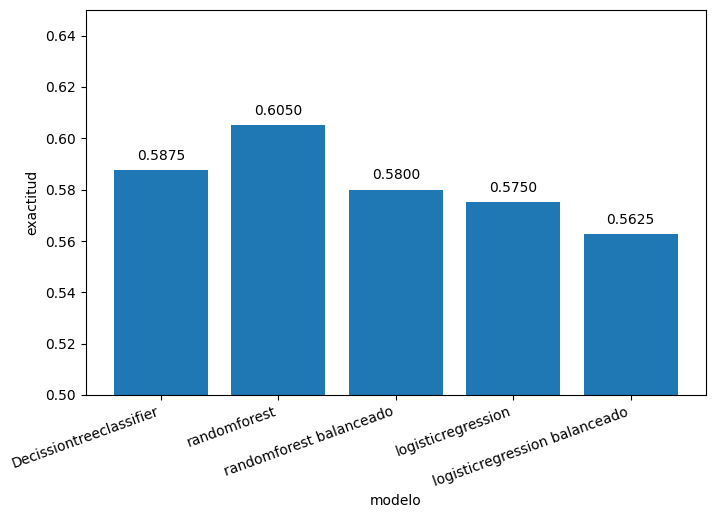

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as mp
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train_enc,y_train)
y_pred_dt=dt.predict(x_test_enc)
acc_dt=accuracy_score(y_test,y_pred_dt)

rf=RandomForestClassifier(random_state=42)
rf.fit(x_train_enc,y_train)
y_pred_rf=rf.predict(x_test_enc)
acc_rf=accuracy_score(y_test,y_pred_rf)

rfbal=RandomForestClassifier(n_estimators=300,max_depth=15,class_weight='balanced',random_state=42)
rfbal.fit(x_train_enc,y_train)
y_pred_rfbal=rfbal.predict(x_test_enc)
acc_rfbal=accuracy_score(y_test,y_pred_rfbal)

lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_enc,y_train)
y_pred_lr=lr.predict(x_test_enc)
acc_lr=accuracy_score(y_test,y_pred_lr)

lrbal=LogisticRegression(max_iter=1000, class_weight='balanced')
lrbal.fit(x_train_enc,y_train)
y_pred_lrbal=lrbal.predict(x_test_enc)
acc_lrbal=accuracy_score(y_test,y_pred_lrbal)

models=['Decissiontreeclassifier', 'randomforest','randomforest balanceado','logisticregression','logisticregression balanceado']
accuracies=[acc_dt, acc_rf,acc_rfbal, acc_lr, acc_lrbal]
mp.figure(figsize=(8,5))
bars=mp.bar(models,accuracies)
mp.ylim(0.5,0.65)
mp.ylabel('exactitud')
mp.xlabel('modelo')
mp.xticks(rotation=20,ha='right')
for bar in bars:
    height=bar.get_height()
    mp.text(bar.get_x()+ bar.get_width()/2,height+0.003,f'{height:.4f}',ha='center',va='bottom')
mp.show()

Cabe destacar que en esta grafica, a diferencia de la anterior, se han quitado datos irelevantes del dataset que generaban ruido alterando los resultados de los modelos, que parece ser que dichos datos irrelevantes afectaban a los modelos, tras eso, parece que el modelo más efectivo es randomforest balanceado, el cual he incluido por probar otro balanceado ya que normalmente suelen mostrar rendimientos diferentes, para trabajar con las mejores columnas de la tabla, pero se va a seguir probando otro modelo como logistic regression balanceado para comparar resultados y cntrastar en internet cual vendría a ser el mejor en este caso independeintemente de los porcenatjes, aunque no hay mejor, mas bien el mas adecuado

En esta grafica, se ha incorporado random forest balanceado(El resto esta configurado igual que la anterior grafica de modelos(Pero con los cambios de datos relevantes en los datasets)), como el logistic regression balanceado,la justificacion de este es que es una version mejorada respecto a la anterior(Y para ver como funciona con datos relevantes). El balanceo de clases de rfb compensa el desbalanceo ya conocido del dataset, y busca mayor estabilidad y mejor rendimiento.

Se va a usar random forest ya que parece ser el mas recurrente para esta clase de casos 

https://insightsoftware.com/es/blog/top-5-predictive-analytics-models-and-algorithms/


* RFB captura mejor las relaciones complejas del dataset y predice breached con mayor precision
* LRB tiene peor rendimiento, pero es util por su interpretabilidad, permitiendo ver que variables afectan mas la probabilidad de breached


Se puede intentar hacer un ejercicio con cada modelo que mas llama la atencion (rfb y lrb)

Las versiones balanced sirven para "penalizar" los errores causados por el desbalance de brecheados y no brecheados

In [36]:
from sklearn.metrics import classification_report
print("Random forest normal")
print(classification_report(y_test, y_pred_rf))
print("random forest balanceado")
print(classification_report(y_test, y_pred_rfbal))

Random forest normal
              precision    recall  f1-score   support

           0       0.61      0.97      0.75       239
           1       0.59      0.06      0.11       161

    accuracy                           0.60       400
   macro avg       0.60      0.52      0.43       400
weighted avg       0.60      0.60      0.49       400

random forest balanceado
              precision    recall  f1-score   support

           0       0.61      0.81      0.70       239
           1       0.46      0.24      0.32       161

    accuracy                           0.58       400
   macro avg       0.54      0.52      0.51       400
weighted avg       0.55      0.58      0.54       400



Comparacion rápida de ranfom forest y random forest balanceado(el nuevo modelo probado en el esquema anterior) que parece ser mejor que el normal, esto se hace para comprobar si de verdad son iguales respecto a lo que muestra la gráfica en un primer lugar

Parece que sacrifica algo de los no brecheados para detectar algo mejor los brecheados

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfbal=RandomForestClassifier(n_estimators=300,max_depth=15,class_weight='balanced',random_state=42)
rfbal.fit(x_train_enc,y_train)
y_pred_rf=rfbal.predict(x_test_enc)

Incorporacion individual de rfb para su analisis en la siguiente celda de código, y para comprobar yo que se ha hecho correctamente la anterior y que no me he equivocado

In [38]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_pred_rf))
confusion_matrix(y_test,y_pred_rf)

              precision    recall  f1-score   support

           0       0.61      0.81      0.70       239
           1       0.46      0.24      0.32       161

    accuracy                           0.58       400
   macro avg       0.54      0.52      0.51       400
weighted avg       0.55      0.58      0.54       400



array([[193,  46],
       [122,  39]])

mismo reporte de clasificacion pero esta vez el de rfb y con una matriz de confusion para ver los resultados 

In [39]:
import pandas as pd
import numpy as np
feature_names=preprocessor.get_feature_names_out()
importances=rfbal.feature_importances_
feat_imp=pd.DataFrame({'campo':feature_names,'peso/importancia':importances}).sort_values(by='peso/importancia',ascending=False)
feat_imp.head(20)

,campo,peso/importancia
1369,cat__Country_Italy,0.010688
1338,cat__Country_French Southern Territories,0.008644
1269,cat__Country_Anguilla,0.008351
1330,cat__Country_Ethiopia,0.008075
568,cat__Domain_johnson.com,0.007975
1504,cat__Country_Zambia,0.007783
1511,cat__Job_Title_Software Engineer,0.007730
1421,cat__Country_Nigeria,0.007467
1500,cat__Country_Vietnam,0.007410
748,cat__Domain_miller.com,0.007371


El peso que tiene cada catacteristica en el dataset(Se han omitido paises porque se volvia ilegible con la gran cantidad que habia, y haciendolo se puede leer mejor)

Por esta parte no se muestran todos datos:
feat_imp.head(20)
Solo muestra 20, se puede aumentar para ver mas, pero es más dificil

In [40]:
feat_imp['base_feature']=feat_imp['campo'].apply(lambda x: x.split('__')[1].split('_')[0])
impprtancia=(feat_imp.groupby('base_feature')['peso/importancia'].sum().sort_values(ascending=False))
impprtancia

base_feature
Country     0.392030
Domain      0.293739
Company     0.255070
Job         0.029341
Password    0.017993
Public      0.011825
Name: peso/importancia, dtype: float64

La iportancia de cada columna individual(para visualizar y decidir que usar/que tenga sentido)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
caracteristicas=['Job_Title','Password_Strength','Public_Pastebin','Country']
xb=df[caracteristicas]
yb=df['Breached']
xb_train,xb_test,yb_train,yb_test=train_test_split(xb,yb,test_size=0.2,random_state=42,stratify=yb)
preprocessor_b=ColumnTransformer([('cat',OneHotEncoder(handle_unknown='ignore'),xb.columns)])
xb_train_enc=preprocessor_b.fit_transform(xb_train)
xb_test_enc=preprocessor_b.transform(xb_test)

Se definen las caratcetristicas a usar en los ejercicios, por decisión, y se configura para que por si alguna caracteristica no se conoce(One hot encoder, y handle unknown) se ignore en el analisis(Por lo que habrá que intentar poner los datos sin fallos, hay que tener en cuenta que es en base al dataset)

In [42]:
from sklearn.linear_model import LogisticRegression
lrbal= LogisticRegression(max_iter=1000,class_weight='balanced')
lrbal.fit(xb_train_enc, yb_train)
yb_pred = lrbal.predict(xb_test_enc)

Se va a usar logistic regression balanceado ya que trabaja mejor con menos columnas(en teoria segun diversas fuentes)(Ya que el objetivo es predecir si un suario está breached en base a la fuerza de la contraseña, public pastebin y el puesto de trabajo). Randomforest es mejor cuantas más variables hay, pero como solo se va a trabajar con 4 para predecir, se usará logisticrgression

In [43]:
from sklearn.metrics import classification_report
print(classification_report(yb_test,yb_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       239
           1       0.47      0.52      0.50       161

    accuracy                           0.57       400
   macro avg       0.56      0.57      0.56       400
weighted avg       0.58      0.57      0.58       400



se ven los "resultados" de lrb, diferentes(un poco  mejores) a los de lr normal(se vió antes)

In [44]:
import numpy as np
feature_names_b=preprocessor_b.get_feature_names_out()
coeffs=lrbal.coef_[0]
coef_df=pd.DataFrame({'feature':feature_names_b,'coefficient':coeffs}).sort_values(by='coefficient',ascending=False)
coef_df

,feature,coefficient
169,cat__Country_Nigeria,1.211980
17,cat__Country_Anguilla,1.156886
146,cat__Country_Martinique,1.076980
36,cat__Country_Bolivia,1.042095
117,cat__Country_Italy,1.009831
...,...,...
129,cat__Country_Latvia,-1.055748
135,cat__Country_Lithuania,-1.059592
105,cat__Country_Holy See (Vatican City State),-1.068373
248,cat__Country_Vietnam,-1.141312


a pesar de no verse explicitamente, se recuerdan algunos de los valores mas y menos relevantes, esto solo lo hago para tener en cuenta que incluir

In [45]:
import numpy as np
import pandas as pd
coef_df['abs_coeff']=coef_df['coefficient'].abs()
coef_df_sorted=coef_df.sort_values(by='abs_coeff',ascending=False)
coef_df_sorted

,feature,coefficient,abs_coeff
169,cat__Country_Nigeria,1.211980,1.211980
86,cat__Country_French Southern Territories,-1.169594,1.169594
17,cat__Country_Anguilla,1.156886,1.156886
248,cat__Country_Vietnam,-1.141312,1.141312
146,cat__Country_Martinique,1.076980,1.076980
...,...,...,...
123,cat__Country_Kenya,-0.006261,0.006261
121,cat__Country_Jordan,0.002342,0.002342
9,cat__Public_Pastebin_No,-0.002269,0.002269
10,cat__Public_Pastebin_Yes,-0.001380,0.001380


**Antes no estaban incluidas las location y se veia claramente ahora, que se ha intentado introducir location, se ve peor** Pero se sigue viendo public pastebin, y se intuye que la passoword strenght esté en medio, dando visualizacion de la "poca relevancia" de cada caracteristica

In [46]:
coef_pais = coef_df[coef_df['feature'].str.contains('cat__pais_')]
coef_no_pais = coef_df[~coef_df['feature'].str.contains('cat__pais_')]

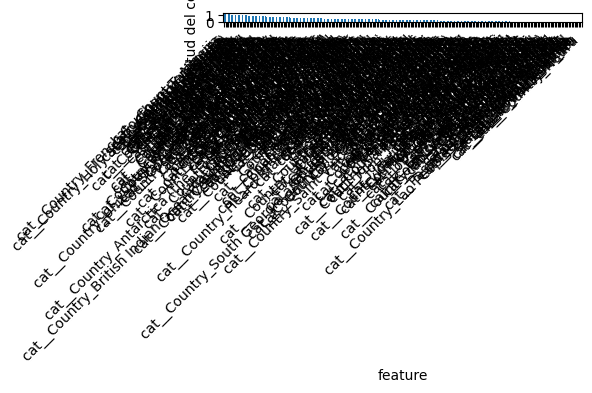

In [47]:
coef_no_pais['abs_coeff'] = coef_no_pais['coefficient'].abs()
coef_no_pais_sorted = coef_no_pais.sort_values(by='abs_coeff', ascending=False)
mp.figure(figsize=(6,4))
coef_no_pais_sorted.set_index('feature')['abs_coeff'].plot(kind='bar')
mp.ylabel('Magnitud del coeficiente')
mp.xticks(rotation=45, ha='right')
mp.tight_layout()
mp.show()

Visualizacion de la importancia en base a repeticion de los puestos de trabajo, password strength , y public pastebin en el dataset, se ha saltado pais ya que si se incluye sería ilegible, es una corrección a la visualizacion de datos de hace un par de celdaas

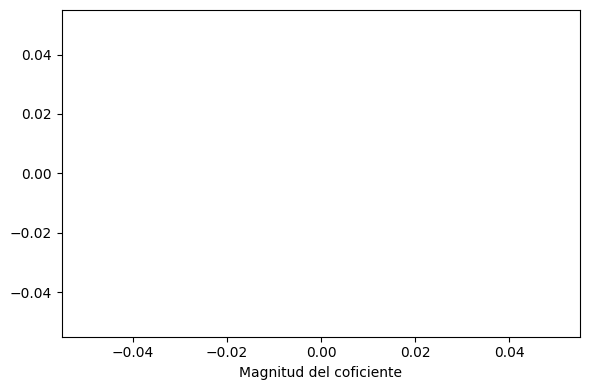

In [48]:
coef_pais['abs_coeff'] = coef_pais['coefficient'].abs()
coef_pais_sorted = coef_pais.sort_values(by='abs_coeff', ascending=False).head(10)
mp.figure(figsize=(6,4))
mp.barh(coef_pais_sorted['feature'].str.replace('cat__pais_', ''),coef_pais_sorted['abs_coeff'])
mp.xlabel('Magnitud del coficiente')
mp.tight_layout()
mp.show()

Esta celda indica la importancia de cada caracteristica(feature) respecto al peso que tienen, es decir, se ignoran los signos para sacar en claro su peso, los resultados son los mismos que la celda anterior, pero ignorando los signos(mejro claridad del peso) y es de solo los mejores paises, respecto a la importancia en el dataset de los mismos, los 10 mas relevantes

In [49]:
import pandas as pd
import numpy as np
trabajo="Penetration Tester"
publico="No"
contrasena="h"
pais="Nigeria"
def fuerza_contrasena(fc):
    puntos=0
    if len(fc)>=12:
        puntos +=1
    if any(char.isdigit() for char in fc):
        puntos+=1
    if any(not char.isalnum() for char in fc):
        puntos+=1

    if puntos <= 1:
        return "Weak"
    elif puntos == 2:
        return "Moderate"
    else:
        return "Strong"
fuerza=fuerza_contrasena(contrasena)
nuevo_usuario=pd.DataFrame([{
    "Job_Title": trabajo,
    "Password_Strength": fuerza,
    "Public_Pastebin": publico,
    "Country":pais
}])

nuevousr = preprocessor_b.transform(nuevo_usuario)
prob=lrbal.predict_proba(nuevousr)[0][1]
pred=lrbal.predict(nuevousr)[0]
print("Fuerza de la contraseña-->",fuerza)
print("Probabilidad de breached-->",round(prob*100,2),"%")

if prob< 0.45:
    print("bajo riesgo de brecha")
elif prob< 0.55:
    print("Riesgo medio de brecha")
else:
    print("riesgo alto de brecha")

Fuerza de la contraseña--> Weak
Probabilidad de breached--> 77.04 %
riesgo alto de brecha


Ejercicio de Logistic regression balanceado

Cabe destacar que , tras analizarlo, para este dataset el logistic regression , al ver los resultados del dataset con menos columnas, se ve que rfb es mejor , aunque para comparar resultados de ambos modelos no esta de mas y sirve para contrastar mejor ambos modelos

En base a las columnas seleccionadas para detectar patrones en el dataset(Password_Strength, Public_Pastebin(Yes, No),y el titulo de trabajo(Intentar poner el titulo igual que como está en el dataset para evitar errores)), el "ejercicio" intenta establecer un porcentaje de probabilidad de que el "usuario" haya sido brecheado en base a la lógica del dataset

Hay un dato que parece error al ejecutarlo, pero que no lo es, normalmente cuanto menos segura es la contraseña, mas probable de ataque que el usaurio deberia ser, lo que pasa es que , como se vió en una grafica anterior, comparacion de usuarios brecheados-contraseña, se ve que es inconsistente en este aspecto ya que el campo de más usuarios brecheados está en las contraseñas strong, y no en las weak, el modelo no lo hace con lógica general , sino en base a los datos del dataset

In [50]:
print("Trabajos:")
print(df['Job_Title'].value_counts())
print("===========================")
print("Public Pastebin:")
print(df['Public_Pastebin'].value_counts())
print("===========================")
print("Compañias")
print(df['Company'].value_counts())

Trabajos:
Job_Title
Data Scientist        354
OSINT Investigator    348
Security Analyst      333
Penetration Tester    331
Network Engineer      317
Software Engineer     317
Name: count, dtype: int64
Public Pastebin:
Public_Pastebin
No     1023
Yes     977
Name: count, dtype: int64
Compañias
Company
Smith Inc                          6
Johnson LLC                        4
Johnson PLC                        4
Smith PLC                          4
Williams Inc                       4
                                  ..
Hahn Ltd                           1
Cunningham, Trujillo and Haynes    1
Sandoval and Sons                  1
Perry, Wright and Kim              1
Chandler, Glenn and Barnes         1
Name: count, Length: 1894, dtype: int64


A partir de aqui, se va a intentar repetir el ejercicio anterior, pero con randomforest, para comprobar la funcionalidad de manera práctica


Esta lista es para tener a mano los datos que poner para los ejercicios, para evitar errores

In [51]:
featuresrf=['Job_Title','Password_Strength','Public_Pastebin','Country']
xrf=df[featuresrf]
yrf=df['Breached']
print("ejecutado")

ejecutado


Por si acaso, se vuelve a repetir la clasificacion de las caracteristicas

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessorrf=ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),featuresrf)])

El handle_unknown tiene la funcion de que si se introduce algun valor inventado en el ejercicio, lo ignora, lo pone como nulo, es decir, no influiría

In [53]:
from sklearn.model_selection import train_test_split
xrf_train,xrf_test,yrf_train, yrf_test=train_test_split(xrf,yrf,test_size=0.2,random_state=42,stratify=yrf)

In [54]:
from sklearn.ensemble import RandomForestClassifier
xrf_trainenc=preprocessorrf.fit_transform(xrf_train)
xrf_testenc=preprocessorrf.transform(xrf_test)
practicarf=RandomForestClassifier(n_estimators=300,max_depth=15,class_weight='balanced',random_state=42)
practicarf.fit(xrf_trainenc,yrf_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=300,
                       random_state=42)

In [55]:
from sklearn.metrics import accuracy_score, classification_report
yrf_pred = practicarf.predict(xrf_testenc)
print(accuracy_score(yrf_test, yrf_pred))

0.605


Revision de la precision/exactyitdo del modelo, con el cambio de location a pais, se ven mas patrones por eso cambia

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.61      0.81      0.70       239
           1       0.46      0.24      0.32       161

    accuracy                           0.58       400
   macro avg       0.54      0.52      0.51       400
weighted avg       0.55      0.58      0.54       400



Esta celda de arriba se añadió despues de  añadir smote para comparar una teoría

In [57]:
import pandas as pd
trabajo = "Penetration Tester"
publico = "No"
contrasena = "h"
pais="Nigeria"
def fuerza_contrasena(fc):
    puntos=0
    if len(fc)>=12:
        puntos+=1
    if any(char.isdigit() for char in fc):
        puntos+=1
    if any(not char.isalnum() for char in fc):
        puntos+=1
    if puntos<=1:
        return "Weak"
    elif puntos== 2:
        return "Moderate"
    else:
        return "Strong"
        
fuerza = fuerza_contrasena(contrasena)
nuevousuario = pd.DataFrame([{
    "Job_Title": trabajo,
    "Password_Strength": fuerza,
    "Public_Pastebin": publico,
    "Country":pais}])
nuevousr= preprocessorrf.transform(nuevousuario)
prob_rf =practicarf.predict_proba(nuevousr)[0][1]

print("Fuerza de la contraseña-->", fuerza)
print("probabilidad de breached segun randomforest-->", round(prob_rf*100, 2),"%")
if prob_rf < 0.45:
    print("bajo riesgo de brecha")
elif prob_rf < 0.55:
    print("Riesgo medio de brecha")
else:
    print("riesgo alto de brecha")

Fuerza de la contraseña--> Weak
probabilidad de breached segun randomforest--> 63.78 %
riesgo alto de brecha


**Ambos ejercicios de práctica de ambos modelos están "bien" en su cierta medida, no es correcto afirmar que un modelo es mas correcto que el otro, aunque el rfb tenga un mejor porcentaje por decirlo asi al compararlos antes de la practica**
**Randomforest toma decisiones basadas en diversos arboles, siendo que cada arbol vea el problema de manera diferente, siendo el resultado de probabilidad una media de decisiones discretas, y siendo mas concretos**

**La poca variacion de resultados en ambos modelos, ninguno va mas bajo del 40% ni mas alto del 60%, se debe a que el propio dataset, si , tiene patrones, pero son suaves,(Es casi 50/50 a decir verdad(1200/800) en base a breached) pero sin serlo, por lo que se podia predecir, pero con variaciones mas pequeñas por la "ambiguedad" del dataset. Basicamente, hay patrones, si, pero son suaves por decirlo de alguna manera**

**No se han tenido en cuenta la varaible de Compañias, ya que hay muchas y apenas se repiten normalmente, las que mas se repiten se repiten 4 veces, se peude usar, si, pero no aporta mucho por la gran cantidad de las mismas que hay**

**Con la introduccion de los paises los resultados son mas claros objetivamente respecto al dataset, ya no muestran la ambuguedad anterior sin elllos**

**Tras buscar informacion en internet el ejercicio de LR Balanceado parece ser el mejor con esta clase de ejercicios aunque ambos modelos predigan correctamente**

A partir de aqui es el intento de mejora del modelo en bas e a ia generativa

Hay que darle a ejecutar todo si se quiere ver lo anterior, al ejecutar todo se ejecuta de arriba a abajo, pero si despues se ejecuta una calda a la mitad, se acumula lo ultimo ejecutado, por lo que da errores/ o no da lo mismo

In [58]:
!pip install --quiet --no-cache-dir "scikit-learn==1.2.2" "imbalanced-learn==0.10.1"
print("smote aplicado")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 7.6 MB/s eta 0:00:00
smote aplicado


Activar el internet , si no no funcionará, a la derecha, en el panel de input, output,table of content,... En table of content, abajo, poner en on la opcion de intenet

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

caracteristicas=['Job_Title','Password_Strength','Public_Pastebin', 'Country']
objetivo='Breached'
df_limpio = df[caracteristicas + [objetivo]].dropna(subset=caracteristicas + [objetivo])
df_train, df_test = train_test_split(df_limpio,test_size=0.2,random_state=42,stratify=df_limpio[objetivo])

print(f"train{len(df_train)},test{len(df_test)}")
print("distribucion breached en train")
print(df_train[objetivo].value_counts(normalize=True).round(3)*100)
x_train=df_train[caracteristicas]
y_train=df_train[objetivo]
x_test=df_test[caracteristicas]
y_test=df_test[objetivo]
preprocessor=ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), caracteristicas)])
x_train_enc=preprocessor.fit_transform(x_train)
x_test_enc=preprocessor.transform(x_test)

smote = SMOTE(sampling_strategy='minority',random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_enc,y_train)
print(f"tamaño original train-->{len(y_train)}")
print(f"ttamaño con smote-->{len(y_train_smote)}")
print("distribucion con smote")
print(pd.Series(y_train_smote).value_counts(normalize=True).round(3)*100)

train1600,test400
distribucion breached en train
Breached
0    59.9
1    40.1
Name: proportion, dtype: float64
tamaño original train-->1600
ttamaño con smote-->1916
distribucion con smote
Breached
1    50.0
0    50.0
Name: proportion, dtype: float64


Voy a añadir una "reacción"/corrección. SMOTE crea locations, asi q hay que tenerlo en cuenta para usar pais y ver patrones, aunque parece que si q lo ha tenido en cuenta, lo he añadido por si acaso

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
modelo_original=RandomForestClassifier(n_estimators=300, max_depth=15, class_weight='balanced', random_state=42)
modelo_original.fit(x_train_enc, y_train)
pred_original=modelo_original.predict(x_test_enc)
acc_original=accuracy_score(y_test, pred_original)

modelo_mejorado=RandomForestClassifier(n_estimators=300,max_depth=15,class_weight='balanced',random_state=42)
modelo_mejorado.fit(x_train_smote, y_train_smote)
pred_mejorado=modelo_mejorado.predict(x_test_enc)
acc_mejorado=accuracy_score(y_test, pred_mejorado)
print(f"Accuracy rfb con dataset original-->{acc_original:.4f}")
print(f"Accuracy rfb con dataset con smote aplicado-->{acc_mejorado:.4f}")
print(f"Diferencia-->{acc_mejorado - acc_original:+.4f}")
if acc_mejorado > acc_original:
    print("El accuray de rfb ha mejorado")
else:
    print("la accuracy es igul o inferior")

Accuracy rfb con dataset original-->0.6050
Accuracy rfb con dataset con smote aplicado-->0.6075
Diferencia-->+0.0025
El accuray de rfb ha mejorado


In [61]:
from sklearn.metrics import classification_report
print("modelo rfb dataset original")
print(classification_report(y_test, pred_original))
print("modelo rfb dataset con smote")
print(classification_report(y_test, pred_mejorado))

modelo rfb dataset original
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       239
           1       0.51      0.52      0.52       161

    accuracy                           0.60       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.61      0.60      0.61       400

modelo rfb dataset con smote
              precision    recall  f1-score   support

           0       0.63      0.83      0.72       239
           1       0.52      0.27      0.36       161

    accuracy                           0.61       400
   macro avg       0.58      0.55      0.54       400
weighted avg       0.59      0.61      0.57       400



Analisis crítico de error conceptual, el modelo de rfb original no es realmente el rfb original, ya que desde eñ classification report del primer rfb con datos que si que eran originales 100% daba resultados muy malos. La razón por la que este ya está mejorado y el que tiene smote aplicado cambia es que se han seleccionado las columnas relevantes. El accuracy mejora, si, pero la predicción de yes baja con rfb con smote

* El dataset original real tenia métricas como 0.09 y/o 0.05, muy malas incluso con rfb
* El dataset "alterado" (df_limpio en la celda en la que se intenta hacer que el dataset se nivele con smote, se eliminan las columnas irrelevantes(dropna) limpiando de ruido el dataset)
* El tercer dataset es al que se le ha aplicado smote ,aumentandolo

Debido a esto, las metricas de rfb con el dataset  original siguen siendo malas, las nuevas metricas del dataset "original" no se deben a smote, sino a la eliminacion de ruido, y las ultimas metricas se deben a que es el dataset con clumnas seleccionadas y smote aplicado

Por lo que la mejora de random forest en el accuracy existe, pero las metricas demuestran lo contrario

In [62]:
import xgboost as xgb
ratio=(y_train==0).sum()/(y_train==1).sum()
modelo_xgb = xgb.XGBClassifier(n_estimators=300,max_depth=15,random_state=42,eval_metric='logloss',scale_pos_weight=ratio)
modelo_xgb.fit(x_train_enc, y_train)
modelo_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [63]:
y_pred_xgb=modelo_xgb.predict(x_test_enc)
acc_xgb=accuracy_score(y_test, y_pred_xgb)
acc_xgb

0.535

In [64]:
from sklearn.metrics import classification_report
y_pred_xgb=modelo_xgb.predict(x_test_enc)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       239
           1       0.43      0.45      0.44       161

    accuracy                           0.54       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.54      0.54      0.54       400



In [65]:
from catboost import CatBoostClassifier
modelo_cat=CatBoostClassifier(iterations=300,depth=15,random_state=42,verbose=0,auto_class_weights='Balanced')
modelo_cat.fit(x_train_enc, y_train)
modelo_cat

In [66]:
y_pred_cat = modelo_cat.predict(x_test_enc)
acc_cat = accuracy_score(y_test, y_pred_cat)
acc_cat

0.555

In [67]:
from sklearn.metrics import classification_report
y_pred_cat=modelo_cat.predict(x_test_enc)
print(classification_report(y_test,y_pred_cat))

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       239
           1       0.45      0.51      0.48       161

    accuracy                           0.56       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.56      0.56      0.56       400



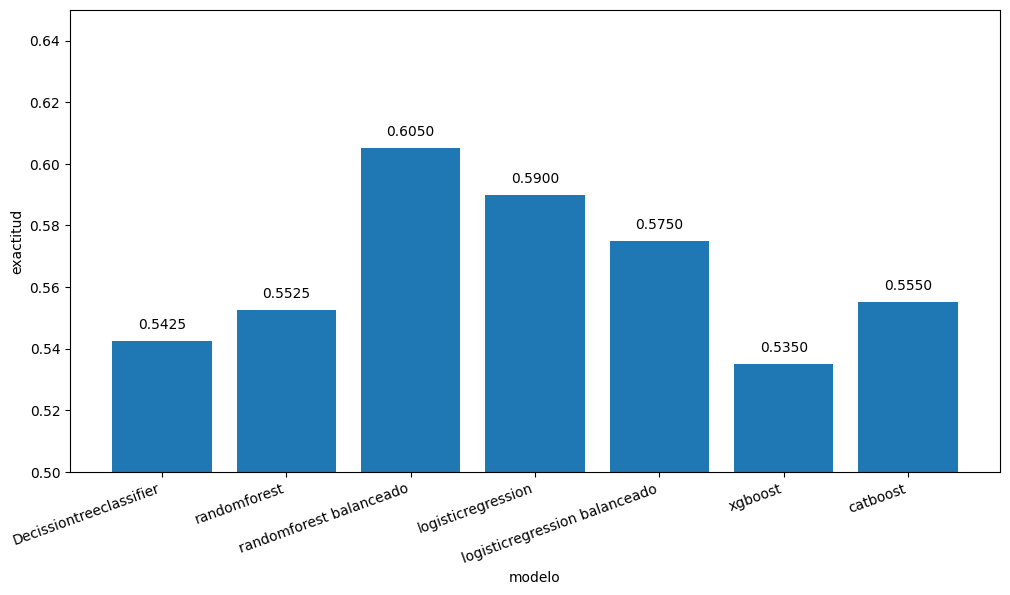

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as mp
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train_enc,y_train)
y_pred_dt=dt.predict(x_test_enc)
acc_dt=accuracy_score(y_test,y_pred_dt)

rf=RandomForestClassifier(random_state=42)
rf.fit(x_train_enc,y_train)
y_pred_rf=rf.predict(x_test_enc)
acc_rf=accuracy_score(y_test,y_pred_rf)

rfbal=RandomForestClassifier(n_estimators=300,max_depth=15,class_weight='balanced',random_state=42)
rfbal.fit(x_train_enc,y_train)
y_pred_rfbal=rfbal.predict(x_test_enc)
acc_rfbal=accuracy_score(y_test,y_pred_rfbal)

lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_enc,y_train)
y_pred_lr=lr.predict(x_test_enc)
acc_lr=accuracy_score(y_test,y_pred_lr)

lrbal=LogisticRegression(max_iter=1000, class_weight='balanced')
lrbal.fit(x_train_enc,y_train)
y_pred_lrbal=lrbal.predict(x_test_enc)
acc_lrbal=accuracy_score(y_test,y_pred_lrbal)

ratio=(y_train==0).sum()/(y_train==1).sum()
modelo_xgb=xgb.XGBClassifier(n_estimators=300,max_depth=15, random_state=42,eval_metric='logloss',scale_pos_weight=ratio)
modelo_xgb.fit(x_train_enc, y_train)
acc_xgb=accuracy_score(y_test, modelo_xgb.predict(x_test_enc))

modelo_cat=CatBoostClassifier(iterations=300,depth=15,random_state=42,verbose=0,auto_class_weights='Balanced')
modelo_cat.fit(x_train_enc,y_train)
acc_cat=accuracy_score(y_test,modelo_cat.predict(x_test_enc))

models=['Decissiontreeclassifier', 'randomforest','randomforest balanceado','logisticregression','logisticregression balanceado','xgboost','catboost']
accuracies=[acc_dt, acc_rf,acc_rfbal, acc_lr, acc_lrbal,acc_xgb,acc_cat]
mp.figure(figsize=(12,6))
bars=mp.bar(models,accuracies)
mp.ylim(0.5,0.65)
mp.ylabel('exactitud')
mp.xlabel('modelo')
mp.xticks(rotation=20,ha='right')
for bar in bars:
    height=bar.get_height()
    mp.text(bar.get_x()+ bar.get_width()/2,height+0.003,f'{height:.4f}',ha='center',va='bottom')
mp.show()

In [70]:
print("rf con smote")
trabajo = "Penetration Tester"
publico = "No"
contrasena = "h"
pais = "Nigeria"
def fuerza_contrasena(fc):
    puntos=0
    if len(fc)>=12:
        puntos+=1
    if any(char.isdigit() for char in fc):
        puntos+=1
    if any(not char.isalnum() for char in fc):
        puntos+=1
    if puntos<=1:
        return "Weak"
    elif puntos==2:
        return "Moderate"
    else:
        return "Strong"
fuerza=fuerza_contrasena(contrasena)
nuevo_usuario = pd.DataFrame([{
    "Job_Title":trabajo,
    "Password_Strength":fuerza,
    "Public_Pastebin":publico,
    "Country":pais
}])
nuevousr=preprocessor.transform(nuevo_usuario)  
prob_rf=modelo_mejorado.predict_proba(nuevousr)[0][1]
pred_rf=modelo_mejorado.predict(nuevousr)[0]

print("fuerza de la contraseña -->",fuerza)
print("probabilidad de brecheo-->",round(prob_rf*100, 2),"%")
if prob_rf < 0.45:
    print("bajo riesgo de brecha")
elif prob_rf < 0.55:
    print("Riesgo medio de brecha")
else:
    print("riesgo alto de brecha")

rf con smote
fuerza de la contraseña --> Weak
probabilidad de brecheo--> 67.12 %
riesgo alto de brecha


El de arriba es un ejercicio de rf con smote, a pesar de que random forest parece empeorar con datos nuevos(Al menos respecto a las metricas) merece la pena mostrarlo con y sin smote pero con caracteristicas seleccionadas 

Tecnicamente hablando, los valores buenos de las metricas de random forest mostrados antes se deben a que las metricas se hacen con las caracteristicticas seleccionadas/columnas del dataset , pero los ejercicios se hacen con caracteristicas definidas, por lo que el modelo usa esas caracteristicas para hacer la predicción porcentual, por eso si se repite con el dataset"original" el ejercicio de rf, sale lo mismo q salió antes


In [71]:
print("catboost")
trabajo="Penetration Tester"
publico="No"
contrasena="h"
pais="Nigeria"
def fuerza_contrasena(fc):
    puntos=0
    if len(fc)>=12:
        puntos+=1
    if any(char.isdigit() for char in fc):
        puntos+=1
    if any(not char.isalnum() for char in fc):
        puntos+=1
    if puntos<=1:
        return "Weak"
    elif puntos==2:
        return "Moderate"
    else:
        return "Strong"
fuerza=fuerza_contrasena(contrasena)
nuevo_usuario = pd.DataFrame([{
    "Job_Title":trabajo,
    "Password_Strength":fuerza,
    "Public_Pastebin":publico,
    "Country":pais
}])
nuevousr = preprocessor.transform(nuevo_usuario)
prob_cat = modelo_cat.predict_proba(nuevousr)[0][1]
pred_cat = modelo_cat.predict(nuevousr)[0]
print("Fuerza de la contraseña -->", fuerza)
print("Probabilidad de breached (CatBoost) -->",round(prob_cat * 100, 2),"%")

if prob_cat < 0.45:
    print("bajo riesgo de brecha")
elif prob_cat < 0.55:
    print("Riesgo medio de brecha")
else:
    print("riesgo alto de brecha")

catboost
Fuerza de la contraseña --> Weak
Probabilidad de breached (CatBoost) --> 58.88 %
riesgo alto de brecha


In [73]:
import joblib

# Guardamos el modelo entrenado
joblib.dump(modelo_cat, 'modelo_catboost.pkl', compress=3)

# Guardamos el preprocesador (Es VITAL para convertir el texto 'Engineer' a números)
joblib.dump(preprocessor, 'preprocesador.pkl', compress=3)

print("¡Archivos guardados! Descarga 'modelo_catboost.pkl' y 'preprocesador.pkl'")

¡Archivos guardados! Descarga 'modelo_catboost.pkl' y 'preprocesador.pkl'
